In [1]:
import pandas as pd
import numpy as np
import math
from scipy import special
import matplotlib.pyplot as plt
import statsmodels.stats.weightstats as sm
from matplotlib import cm

In [2]:
# N_steps = 10
N_steps_orig = 1800 
N_k = 64
T_h = 18000
N_x = 21
N_y = 21

### Define input files


In [18]:
# result_loc = "./../../../../Server_results/10_04_2021_less_random/"
# run_name = "experiment04_10_11_04_40"
result_loc = "./../../../../Server_results/10_06_2021_fix_mean/"
run_name = "experiment05_10_17_08_44"


train_loc = "Run_no_zero_flow_no_oscilations_Run_Run_1633466607/"

### Load files and reshape them

In [19]:

p = np.loadtxt(f"{result_loc}{run_name}p.txt")
p = p.reshape([-1,N_k])

N_epoch = p.shape[0]

q_x = np.loadtxt(f"{result_loc}{run_name}q_x.txt")
q_x = q_x.reshape([N_epoch,N_k,-1])
q_y = np.loadtxt(f"{result_loc}{run_name}q_y.txt")
q_y = q_y.reshape([N_epoch,N_k,-1])
k_x = np.loadtxt(f"{result_loc}{run_name}k_x.txt")
k_x = k_x.reshape([N_epoch,N_k,-1])
k_y = np.loadtxt(f"{result_loc}{run_name}k_y.txt")
k_y = k_y.reshape([N_epoch,N_k,-1])
k_xy = np.loadtxt(f"{result_loc}{run_name}k_xy.txt")
k_xy = k_xy.reshape([N_epoch,N_k,-1])

lam = np.loadtxt(f"{result_loc}{run_name}lambda.txt")

N_steps = q_x.shape[2]

In [20]:
# p.shape

In [21]:
def plot_cdf(p,qoi,time_step,epoch,label=''):
    P = p[epoch]
    QOI = qoi[epoch,:,time_step]

    index = np.argsort(QOI)
    plt.plot(np.ravel([QOI[index],QOI[index]],'f'),np.ravel([np.array([0,*np.cumsum(P)[:-1]]),np.cumsum(P)],'F'),label=label)

Evolution of cdf for different lambda

In [22]:
q_MC_x = np.loadtxt(f"{train_loc}Q_x_5.txt")
q_MC_y = np.loadtxt(f"{train_loc}Q_y_5.txt")


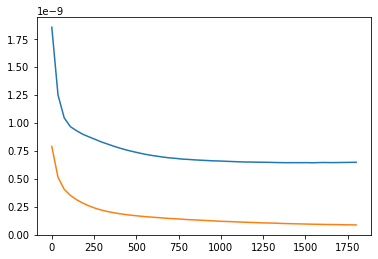

In [62]:
epoch = 4
plt.plot(np.linspace(1,1800,N_steps),np.inner(q_y[epoch,:,:].T,p[epoch,:]))
epoch = 2
plt.plot(np.linspace(1,1800,N_steps),np.inner(q_y[epoch,:,:].T,p[epoch,:]))


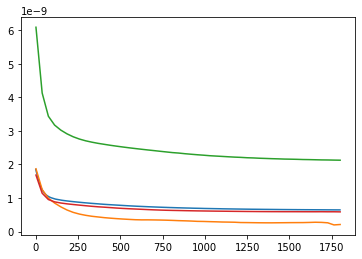

In [49]:
epoch = 25

plt.plot(q_MC_y.mean(axis=0))
plt.plot(np.linspace(1,1800,N_steps),np.inner(q_y[epoch,:,:].T,p[epoch,:]))
plt.plot(np.linspace(1,1800,N_steps),q_y[epoch,0:4,:].max(axis=0))
plt.plot(np.linspace(1,1800,N_steps),q_y[epoch,0:4,:].min(axis=0))

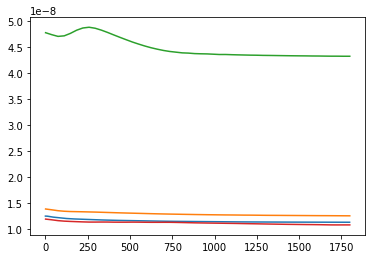

In [51]:
epoch = 25

plt.plot(q_MC_x.mean(axis=0))
plt.plot(np.linspace(1,1800,N_steps),np.inner(q_x[epoch,:,:].T,p[epoch,:]))
plt.plot(np.linspace(1,1800,N_steps),q_x[epoch,0:4,:].max(axis=0))
plt.plot(np.linspace(1,1800,N_steps),q_x[epoch,0:4,:].min(axis=0))

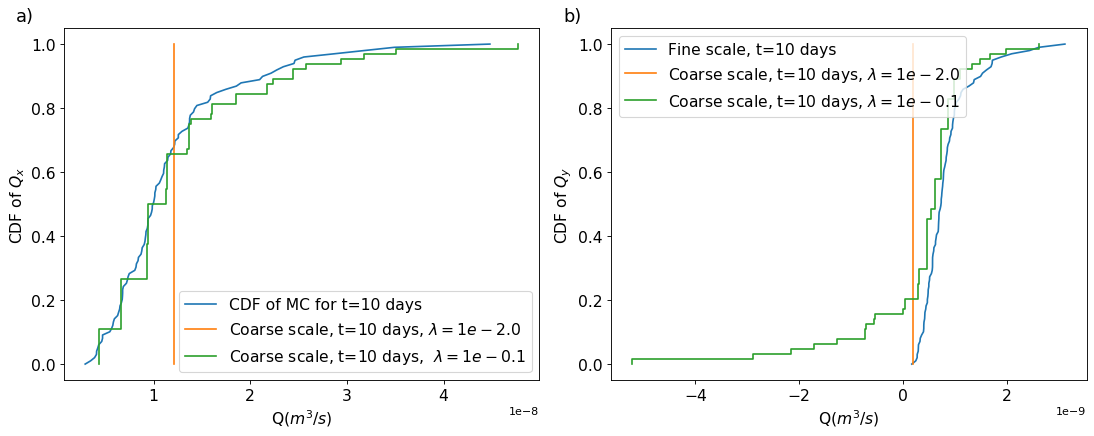

In [70]:
epoch_1 = 1
epoch_2 = 40
time_step = 10


my_dpi = 80
fig, axs = plt.subplots(1, 2, figsize=(1100/my_dpi, 400/my_dpi), dpi=my_dpi)
fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.15)
ax1 = plt.subplot(121)
ax1.text(-0.1, 1.02, 'a)', transform=ax1.transAxes,size=16)

ii = N_steps_orig//(N_steps-1) * (time_step) -1

Q_MC = q_MC_x[:,ii]

index_MC = np.argsort(Q_MC)
plt.plot(Q_MC[index_MC],np.linspace(0,1,100),label=rf'CDF of MC for t={time_step} days')
plot_cdf(p,q_x ,time_step,epoch_1,label=rf'Coarse scale, t={time_step} days, $\lambda = 1e{np.round(lam[epoch_1],1)}$')
plot_cdf(p,q_x ,time_step,epoch_2,label=rf'Coarse scale, t={time_step} days,  $\lambda = 1e{np.round(lam[epoch_2],1)}$')

plt.xlabel(r'Q($m^3/s$)', fontsize= 14)
plt.ylabel(r'CDF of $Q_x$', fontsize= 14)

plt.tick_params(axis='both', which='major', labelsize=14)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.legend(loc=4, fontsize= 14)


ax1 = plt.subplot(122)
ax1.text(-0.1, 1.02, 'b)', transform=ax1.transAxes,size=16)

Q_MC = q_MC_y[:,ii]

index_MC = np.argsort(Q_MC)
plt.plot(Q_MC[index_MC],np.linspace(0,1,100),label=rf'Fine scale, t={time_step} days')
plot_cdf(p,q_y ,time_step,epoch_1,label=rf'Coarse scale, t={time_step} days, $\lambda = 1e{np.round(lam[epoch_1],1)}$')
plot_cdf(p,q_y ,time_step,epoch_2,label=rf'Coarse scale, t={time_step} days, $\lambda = 1e{np.round(lam[epoch_2],1)}$')

plt.xlabel(r'Q($m^3/s$)', fontsize= 14)
plt.ylabel(r'CDF of $Q_y$', fontsize= 14)

plt.tick_params(axis='both', which='major', labelsize=14)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.legend(loc=2, fontsize= 14)
plt.savefig('./../../../plots/2d_cdf_paper.pdf', bbox_inches='tight',dpi=my_dpi)

plt.show()

In [75]:
q_x[epoch,:,39]

array([4.32615292e-08, 1.54597165e-08, 1.54569815e-08, 1.78301235e-08,
       1.09507318e-08, 1.32953590e-08, 1.78664510e-08, 2.78321766e-08,
       3.38574281e-08, 1.54826458e-08, 1.31839396e-08, 1.31573359e-08,
       1.31522770e-08, 1.31917419e-08, 1.31831857e-08, 2.15080484e-08,
       2.36284183e-08, 4.21004204e-09, 9.07685030e-09, 9.02862790e-09,
       9.01496413e-09, 9.00556360e-09, 9.00102313e-09, 2.40471763e-08,
       9.07862323e-09, 6.41538539e-09, 6.42071337e-09, 6.44347877e-09,
       6.42755443e-09, 6.43536487e-09, 6.42379361e-09, 9.04034682e-09,
       3.07973449e-08, 1.09242496e-08, 1.09423696e-08, 9.07393205e-09,
       1.09603360e-08, 9.03413411e-09, 9.04576804e-09, 2.09998594e-08,
       2.09919716e-08, 1.09235037e-08, 1.09451467e-08, 1.09239231e-08,
       1.09700826e-08, 1.09587570e-08, 1.09377554e-08, 4.20738972e-09,
       2.36079358e-08, 4.19191457e-09, 6.44146504e-09, 9.00201536e-09,
       4.21690558e-09, 9.00796424e-09, 9.11435808e-09, 1.30466199e-08,
      

In [ ]:
# x1_2d = k_y[epoch,:,:]
# w1 = p[epoch,:]
# d1 = sm.DescrStatsW(x1_2d, weights=w1)
# df_mean = d1.mean
# df_perc = d1.quantile([0.25,0.5,0.75]).values.T

In [ ]:
# b_perc =df_perc


In [31]:
def plot_k(t,k,p,epoch):
    x1_2d = k[epoch,:,:]
    w1 = p[epoch,:]
    d1 = sm.DescrStatsW(x1_2d, weights=w1)
    df_mean = d1.mean
    df_perc = d1.quantile([0.25,0.5,0.75]).values.T
    b_perc =df_perc

    plt.fill_between(t,b_perc[:,0],b_perc[:,2],color=cm.get_cmap('tab20c')(3))
    plt.plot(t,b_perc[:,0], linewidth=2.5,label=r'$25^{th} / 75^{th}   percentile$',color=cm.get_cmap('tab20c')(0))
    plt.plot(t,b_perc[:,2], linewidth=2.5,color=cm.get_cmap('tab20c')(0))
    plt.plot(t,df_mean,linewidth=2.5,label=r'$Mean$',ls='--',color=cm.get_cmap('tab20c')(5))
    


In [63]:
epoch = 40
t = np.linspace(0,1800,50)

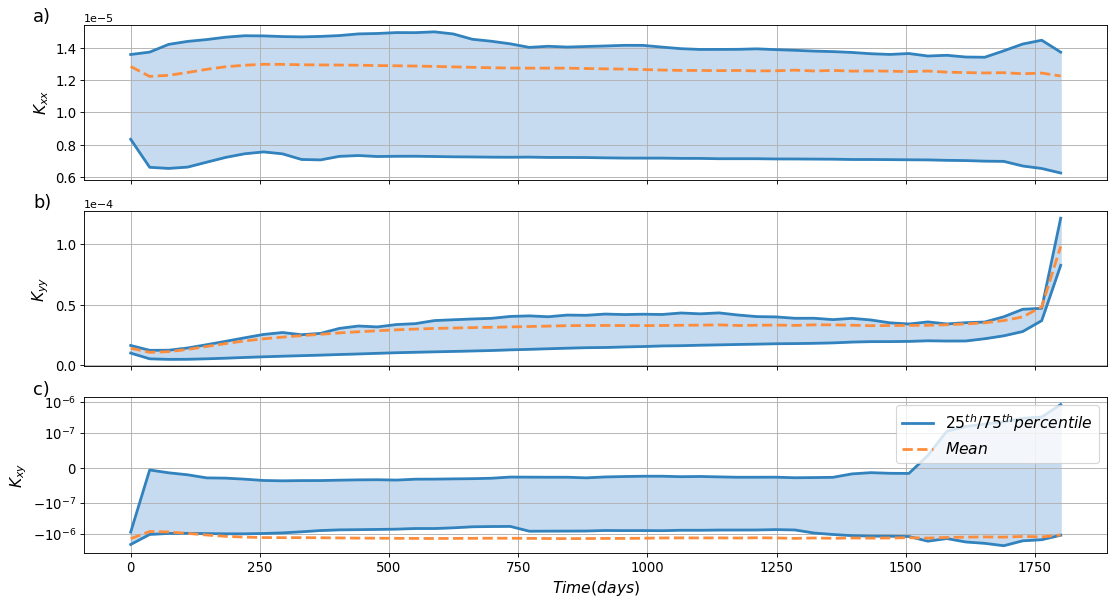

In [76]:
my_dpi = 80
fig, axs = plt.subplots(3, 1, figsize=(1100/my_dpi, 600/my_dpi), dpi=my_dpi)
fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.15)

ax1 = plt.subplot(311)
plot_k(t,k_x,p,epoch)
plt.yscale('linear')
plt.tick_params(axis='y',which='both', labelsize=12)
plt.grid()
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax1.text(-0.05, 1.02, 'a)', transform=ax1.transAxes,size=16)
plt.setp(ax1.get_xticklabels(), visible=False)
plt.ylabel(r'$K_{xx}$', fontsize= 14)


ax2 = plt.subplot(312)
plot_k(t,k_y,p,epoch)
plt.yscale('linear')
plt.tick_params(axis='y',which='both', labelsize=12)
plt.grid()
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax2.text(-0.05, 1.02, 'b)', transform=ax2.transAxes,size=16)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.ylabel(r'$K_{yy}$', fontsize= 14)


ax3 = plt.subplot(313)
plot_k(t,k_xy,p,epoch)
plt.yscale('symlog', linthreshy=1e-7)
plt.tick_params(axis='y',which='both', labelsize=12)
plt.tick_params(axis='x',which='both', labelsize=12)
plt.legend(loc=1, fontsize= 14)
plt.grid()
ax3.text(-0.05, 1.02, 'c)', transform=ax3.transAxes,size=16)
plt.ylabel(r'$K_{xy}$', fontsize= 14)

plt.xlabel(r'$Time (days)$', fontsize= 14)

plt.savefig('./../../../plots/2d_k_evo_paper.pdf', bbox_inches='tight',dpi=my_dpi)


In [52]:
k_xy.shape

(95, 64, 50)